<a href="https://colab.research.google.com/github/ddoddii/Mycolab/blob/master/HW5_SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Social Network Analysis (SNA; 사회적 연결망 분석)

채점 기준 (상, 중상, 중, 중하, 하)

1) SNA 연구 목적과 그에 맞는 node와 edge, attribute 정의

2) 구성한 네트워크의 structure 정보 (degree distribution/density/diameter/reciprocity/transitivity) 확인 및 결과에 대한 설명

3) 노드 중심성(Degree/betweenness/closeness/eigenvector 등) 지표 별 Key actor에 대한 설명

4) 결론 제시

* creative application areas of SNA를 추가로 작성해주시는 경우 bonus가 적용될 수도 있습니다.

## 1) SNA 연구 목적과 그에 맞는 node와 edge, attribute 정의

-연구목적




미중간, 한일간, 한중간, 호주-중국간의 외교적인 마찰과 러시아의 우크라이나 침략등의 원인으로 요소수 부족 사태, 물가 폭등, 반도체 부족 등 공급망과 무역에 있어 문제가 발생하였다. 따라서 "국가들간의 무역 관계가 어떤지, 주요 무역국은 어디인지 공급망에 문제가 있을경우 어떻게 해결할 수 있는지" 파악하기 위해서 사회적 연결망 분석을 사용하여 분석을 해보고자 한다.

데이터는 2012년 양국간 UN Comtrade 알루미늄 스크랩 수출 무역 데이터를 사용하였다.
csv 데이터는 country 1: 수출 국가 코드, country2: 수입 국가 코드, val_exp_ijp: 1년 기간 동안 수출된 인플레이션 조정된 미국 달러 가치이다. 
데이터는 다음 주소에서 가져왔다.
https://github.com/bdecon/bdecon.github.io/blob/master/files/760200_2012.csv

해당 데이터를 SNA 연구로 사용하기 위해 node, edge, attribute를 정의하였다. node는 
수출 또는 수입하는 국가코드, edge는 국가들의 무역, attribute는 country1이 수출국, country2가 수입국이므로 (directed)방향성이 있으며 weight의 경우 환율변환된 수출 및 수입금액으로 정의할 수 있다. 
국가 코드의 경우 다음 사이트에서 확인할 수 있다.
https://ko.wikipedia.org/wiki/%EA%B5%AD%EA%B0%80%EB%B3%84_%EA%B5%AD%EA%B0%80_%EC%BD%94%EB%93%9C_%EB%AA%A9%EB%A1%9D


In [ ]:
import networkx as nx
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/HW5/globaltrade_2012.csv')   #데이터셋 불러오기
print(data)

     country1 country2  val_exp_ijp
0         ABW      CAN   12473.0000
1         ABW      CHN  116722.0000
2         ABW      COL    2179.0000
3         ABW      IND    6652.0000
4         ABW      KOR   36636.0000
...       ...      ...          ...
1865      ZAF      THA  552367.0000
1866      ZAF      USA  373748.0000
1867      ZAF      ZMB       4.0000
1868      ZMB      ZAF  260933.9844
1869      ZWE      IND  179564.0000

[1870 rows x 3 columns]


**Definition for SNA**

Coutnry 1: 수출국가

Country 2: 수입국가

Val_exp_ijp: 수출품의 가치

양 국간 무역 네트워크 분석을 위하여 

Country 1(수출국가)를 Source node 

Counry 2(수입국가)를 Target node

Val_exp_ujp(수출품의 가치)를 두 노드 사이의 Attribute로 두고  

분석에서는 Attribute를 각 노드의 'Weight'라 칭하고 

알루미늄 스크랩 시장에서의 각 국가의 위치를 분석하고자 한다 

In [ ]:
data.columns=['Source','Target','Weight']   #열의 이름 바꾸어주기

In [ ]:
data

,Source,Target,Weight
0,ABW,CAN,12473.0000
1,ABW,CHN,116722.0000
2,ABW,COL,2179.0000
3,ABW,IND,6652.0000
4,ABW,KOR,36636.0000
...,...,...,...
1865,ZAF,THA,552367.0000
1866,ZAF,USA,373748.0000
1867,ZAF,ZMB,4.0000
1868,ZMB,ZAF,260933.9844


Undirected 데이터일 경우 데이터 중복이 있을 수 있기 때문에 중복치들을 제거해주어야 한다 

In [ ]:
data.drop_duplicates(subset=['Source', 'Target', 'Weight'], inplace=True)   #중복제거

In [ ]:
data

,Source,Target,Weight
0,ABW,CAN,12473.0000
1,ABW,CHN,116722.0000
2,ABW,COL,2179.0000
3,ABW,IND,6652.0000
4,ABW,KOR,36636.0000
...,...,...,...
1865,ZAF,THA,552367.0000
1866,ZAF,USA,373748.0000
1867,ZAF,ZMB,4.0000
1868,ZMB,ZAF,260933.9844


데이터가 directed 하기때문에 중복치를 제거해주는 과정을 거쳤어도 어떠한 데이터도 제거되지 않았다

## 2)Structure

2) 구성한 네트워크의 structure 정보 (degree distribution/density/diameter/reciprocity/transitivity) 확인 및 결과에 대한 설명

네트워크 이해를 위해 Structure를 파악하고자 한다. 

네트워크의 Structure는

Degree distribution: 네트워크에서 각 노드가 가진 Edge수(degree)의 분포 

Diameter:네트워크에서 가장 멀리 연결된 pair의 거리

density: 모든 edge의 개수와 실제 edge 수(k)의 비

reciprocity: 두 노드가 주고 받는 비율 (Driected Graph의 경우 의미가 있고,  Directed data로 분석을 진행하기 때문에 의미가 있다)

transitivity: 3 이상의 관계에서 연결된 비율

로 파악할 수 있다.

In [ ]:
G_data = nx.from_pandas_edgelist(data,  source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

In [ ]:
print(nx.info(G_data))

DiGraph with 135 nodes and 1870 edges


네트워크는 135개의 node, 1870개의 edge 로 이루어져 있다.
자세한 노드와 엣지는 다음과 같다.

In [ ]:
G_data.nodes

NodeView(('ABW', 'CAN', 'CHN', 'COL', 'IND', 'KOR', 'MEX', 'SVN', 'USA', 'VEN', 'ALB', 'BEL', 'BRA', 'DEU', 'GBR', 'GRC', 'ISR', 'ITA', 'MKD', 'NLD', 'SER', 'TUR', 'ARG', 'ECU', 'MYS', 'ARM', 'BLZ', 'AUS', 'BHR', 'CHE', 'ESP', 'FJI', 'FRA', 'HKG', 'JPN', 'LUX', 'NCL', 'NGA', 'NZL', 'OAS', 'PAK', 'PHL', 'SGP', 'THA', 'VNM', 'ZAF', 'AUT', 'BGR', 'CYP', 'CZE', 'HRV', 'HUN', 'IRL', 'POL', 'ROM', 'SVK', 'AZE', 'RUS', 'DNK', 'GHA', 'NOR', 'SAU', 'SWE', 'TUN', 'BEN', 'FIN', 'JOR', 'QAT', 'BHS', 'PRT', 'BIH', 'LTU', 'BLR', 'BMU', 'BOL', 'CRI', 'BRB', 'BTN', 'CAF', 'CMR', 'LKA', 'MAR', 'CHL', 'URY', 'ETH', 'MDG', 'MLI', 'TZA', 'ZMB', 'CIV', 'COG', 'CPV', 'NIC', 'EST', 'LVA', 'LBN', 'MDA', 'NAM', 'DMA', 'MLT', 'DOM', 'PER', 'FSM', 'ISL', 'OMN', 'GEO', 'GRL', 'GTM', 'HND', 'GUY', 'MNT', 'MOZ', 'UGA', 'PSE', 'JAM', 'MSR', 'KAZ', 'KGZ', 'KHM', 'KIR', 'MAC', 'MDV', 'MUS', 'NER', 'PAN', 'SLV', 'PYF', 'PLW', 'PRY', 'RWA', 'SEN', 'TGO', 'BDI', 'YEM', 'ZWE'))

노드는 국가코드 3글자로 이루어져 있으며 총 135개의 노드가 존재한다.

ex) CHN: 중국, IND:인도

In [ ]:
G_data.edges

OutEdgeView([('ABW', 'CAN'), ('ABW', 'CHN'), ('ABW', 'COL'), ('ABW', 'IND'), ('ABW', 'KOR'), ('ABW', 'MEX'), ('ABW', 'SVN'), ('ABW', 'USA'), ('ABW', 'VEN'), ('CAN', 'BEL'), ('CAN', 'BLZ'), ('CAN', 'BRA'), ('CAN', 'CHE'), ('CAN', 'CHN'), ('CAN', 'CRI'), ('CAN', 'DEU'), ('CAN', 'ESP'), ('CAN', 'FRA'), ('CAN', 'GBR'), ('CAN', 'HKG'), ('CAN', 'IND'), ('CAN', 'ITA'), ('CAN', 'JPN'), ('CAN', 'KOR'), ('CAN', 'LKA'), ('CAN', 'MEX'), ('CAN', 'MYS'), ('CAN', 'NLD'), ('CAN', 'OAS'), ('CAN', 'PAK'), ('CAN', 'PRT'), ('CAN', 'THA'), ('CAN', 'USA'), ('CAN', 'VNM'), ('CHN', 'ABW'), ('CHN', 'AUS'), ('CHN', 'BOL'), ('CHN', 'BRA'), ('CHN', 'CAN'), ('CHN', 'CHE'), ('CHN', 'CRI'), ('CHN', 'DEU'), ('CHN', 'DNK'), ('CHN', 'ESP'), ('CHN', 'ETH'), ('CHN', 'FRA'), ('CHN', 'GBR'), ('CHN', 'GHA'), ('CHN', 'GRC'), ('CHN', 'HKG'), ('CHN', 'IND'), ('CHN', 'IRL'), ('CHN', 'ITA'), ('CHN', 'JPN'), ('CHN', 'KOR'), ('CHN', 'MDG'), ('CHN', 'MLI'), ('CHN', 'MYS'), ('CHN', 'NGA'), ('CHN', 'NLD'), ('CHN', 'NOR'), ('CHN', 'NZ

엣지는 수출하는 국가와 수입하는 국가가 쌍을 이루며 총 1870개의 엣지로 이루어져 있다. 

###Degree distribution

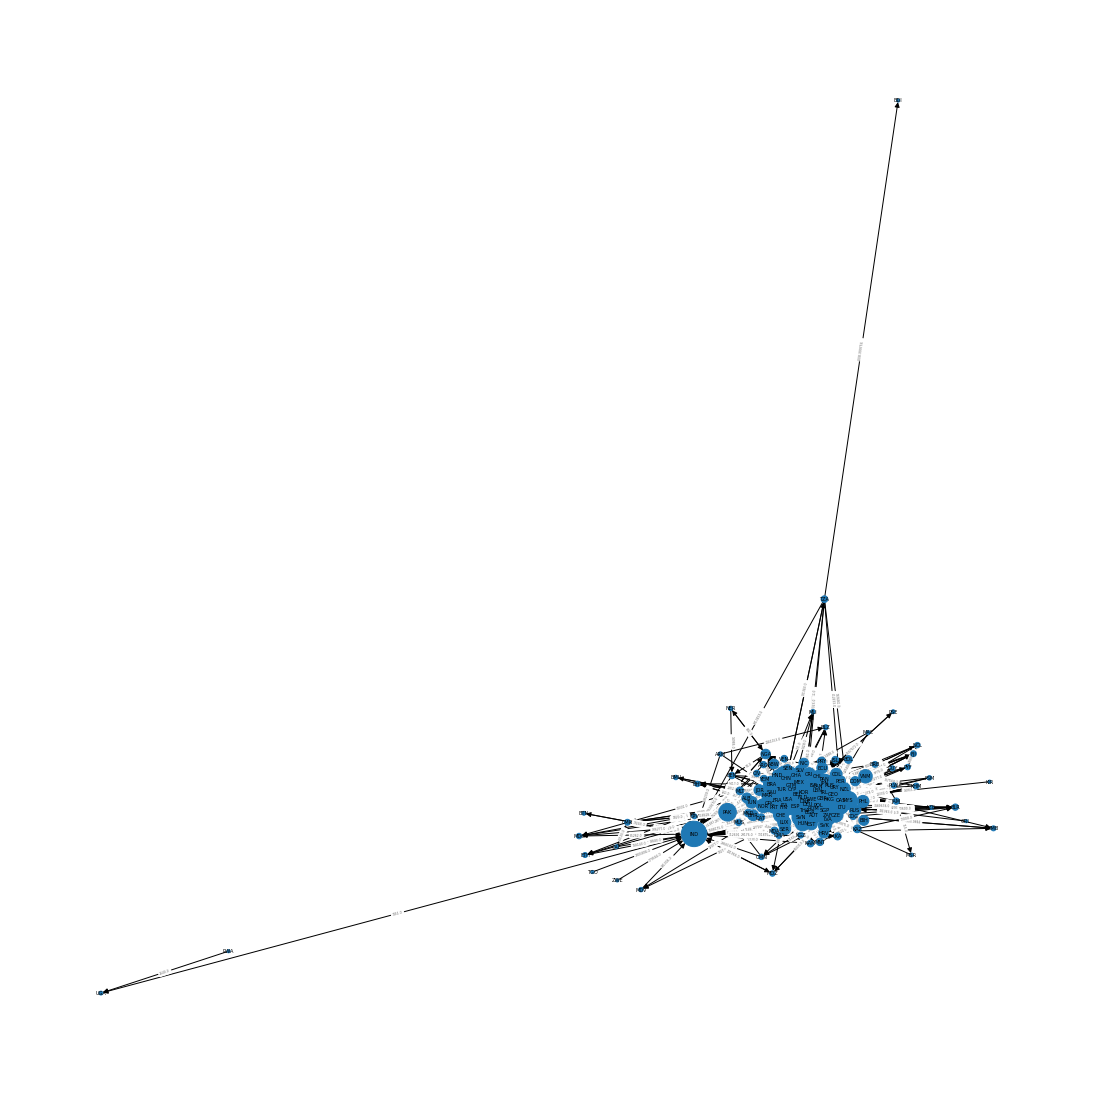

In [ ]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
nx.draw(G_data, pos, with_labels=True, node_size=[5 + v[1]*5 for v in degree], font_size = 5) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data, 'Weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

해당 이미지가 작아 전체적으로 노드와 글자크기를 키워주었다. 

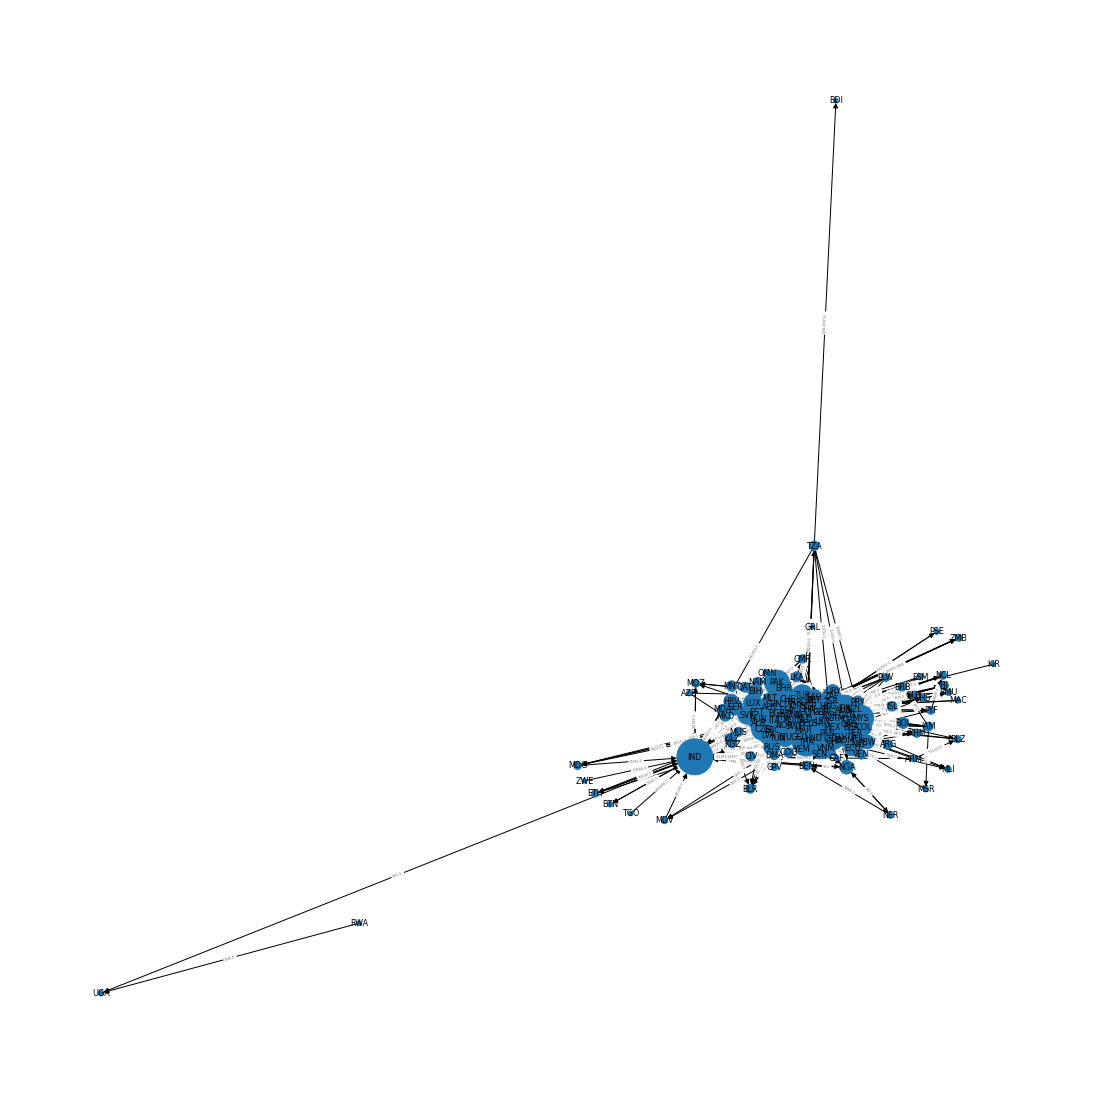

In [ ]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
nx.draw(G_data, pos, with_labels=True, node_size=[10 + v[1]*10 for v in degree], font_size = 8) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data, 'Weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

Degree Distribution을 해석해보려 한다.

가장 눈에 띄는 것은 인도이다. 대부분의 Size가 큰 Node들끼리 중앙에서 뭉쳐있는데 비해서 인도의 경우 중앙에서 조금 떨어져서 Size가 작은 Node 들과도 edge를 가지고 있다. 이는 인도의 경우 무역량이 많은 선진국들 뿐만 아니라 무역량이 적은 후진국들과도 무역을 진행하고 있음을 알 수 있었다.


Size가 큰 Node들이 중앙에 뭉쳐있는 것으로 보아 무역량이 많은 국가들의 주요 무역 상대국 역시 무역량들이 많은 국가들임을 알 수 있었다.


Size가 작은 node들의 경우 대부분 소수의 국가들과만 edge를 가지고 있다.  다양한 국가에 무역량을 의존하는 것이 아닌 소수의 국가에만 무역량을 의존한다는 것이다. 이는 무역량이 떨어지는 후진국들의 경우 다양한 국가들과 거래하기 위한 무역시스템이 제대로 갖추어 있지 않기 때문이라고 보여진다.

추가적으로 RWA, UGA, BDI의 경우에는 다른 국가들과의 무역이 매우 적음을 알 수 있다.

실제 연결된 Degree수를 추가적으로 파악해본다.

In [ ]:
degree

DiDegreeView({'ABW': 18, 'CAN': 45, 'CHN': 121, 'COL': 26, 'IND': 128, 'KOR': 105, 'MEX': 53, 'SVN': 55, 'USA': 125, 'VEN': 8, 'ALB': 19, 'BEL': 81, 'BRA': 47, 'DEU': 118, 'GBR': 104, 'GRC': 54, 'ISR': 37, 'ITA': 99, 'MKD': 11, 'NLD': 107, 'SER': 25, 'TUR': 45, 'ARG': 7, 'ECU': 22, 'MYS': 65, 'ARM': 3, 'BLZ': 4, 'AUS': 36, 'BHR': 22, 'CHE': 45, 'ESP': 74, 'FJI': 6, 'FRA': 87, 'HKG': 70, 'JPN': 64, 'LUX': 33, 'NCL': 5, 'NGA': 17, 'NZL': 30, 'OAS': 81, 'PAK': 61, 'PHL': 28, 'SGP': 46, 'THA': 81, 'VNM': 35, 'ZAF': 33, 'AUT': 52, 'BGR': 36, 'CYP': 26, 'CZE': 45, 'HRV': 20, 'HUN': 46, 'IRL': 24, 'POL': 58, 'ROM': 45, 'SVK': 33, 'AZE': 2, 'RUS': 25, 'DNK': 51, 'GHA': 23, 'NOR': 38, 'SAU': 22, 'SWE': 48, 'TUN': 26, 'BEN': 7, 'FIN': 33, 'JOR': 22, 'QAT': 9, 'BHS': 5, 'PRT': 28, 'BIH': 19, 'LTU': 32, 'BLR': 7, 'BMU': 3, 'BOL': 11, 'CRI': 29, 'BRB': 6, 'BTN': 2, 'CAF': 2, 'CMR': 6, 'LKA': 9, 'MAR': 24, 'CHL': 25, 'URY': 17, 'ETH': 4, 'MDG': 5, 'MLI': 3, 'TZA': 8, 'ZMB': 4, 'CIV': 7, 'COG': 8, 'C

각 노드의 Degree 수는 위와 같고 Degree가 큰 순서대로 확인한다.

In [ ]:
degree_before=dict(degree())

In [ ]:
degree_sort=sorted(degree_before.items(),key=lambda x:x[1],reverse=True)

In [ ]:
degree_sort

[('IND', 128),
 ('USA', 125),
 ('CHN', 121),
 ('DEU', 118),
 ('NLD', 107),
 ('KOR', 105),
 ('GBR', 104),
 ('ITA', 99),
 ('FRA', 87),
 ('BEL', 81),
 ('OAS', 81),
 ('THA', 81),
 ('ESP', 74),
 ('HKG', 70),
 ('MYS', 65),
 ('JPN', 64),
 ('PAK', 61),
 ('POL', 58),
 ('SVN', 55),
 ('GRC', 54),
 ('MEX', 53),
 ('AUT', 52),
 ('DNK', 51),
 ('SWE', 48),
 ('BRA', 47),
 ('SGP', 46),
 ('HUN', 46),
 ('CAN', 45),
 ('TUR', 45),
 ('CHE', 45),
 ('CZE', 45),
 ('ROM', 45),
 ('NOR', 38),
 ('ISR', 37),
 ('AUS', 36),
 ('BGR', 36),
 ('LVA', 36),
 ('VNM', 35),
 ('LUX', 33),
 ('ZAF', 33),
 ('SVK', 33),
 ('FIN', 33),
 ('LTU', 32),
 ('NZL', 30),
 ('CRI', 29),
 ('PHL', 28),
 ('PRT', 28),
 ('COL', 26),
 ('CYP', 26),
 ('TUN', 26),
 ('SER', 25),
 ('RUS', 25),
 ('CHL', 25),
 ('EST', 25),
 ('IRL', 24),
 ('MAR', 24),
 ('GHA', 23),
 ('LBN', 23),
 ('ECU', 22),
 ('BHR', 22),
 ('SAU', 22),
 ('JOR', 22),
 ('GTM', 21),
 ('PAN', 21),
 ('HRV', 20),
 ('ALB', 19),
 ('BIH', 19),
 ('HND', 19),
 ('ABW', 18),
 ('NIC', 18),
 ('NGA', 17),

실제로 인도의 경우 무역량이 적은 후진국들과도 많은 거래를 진행하기 때문에 Degree가 가장 높았고

Degree가 1인 node들중 BDI와 ZWE의 경우는 인도와만 거래를 진행하던 국가들이였다.

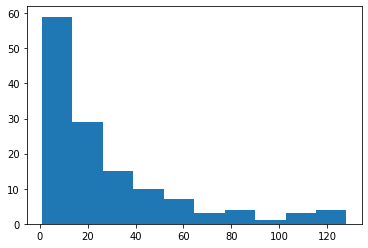

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

Degree의 분포를 해석하자면

각 국가간 무역하는 국가들은 10개 국가 이하인 곳이 많았고 , 60개 이상의 국가와 거래하는 국가들은 그 수가 급격히 줄었다.

현재 분석을 진행하는 알루미늄 스크랩 데이터 뿐 만 아니라 글로벌 거래가 되는 대부분의 제품들이 이와 비슷한 분포를 띠게된다. 

이는 국가별로 경제적, 사회적, 자연적 조건이 다르기 때문에 각각의 제품마다 각 조건에 가장 잘 부합하는 소수의 국가들이 대부분의 수량을 거래하고 다수의 국가들은 소수의 국가로부터만 해당 제품을 거래하기 때문이다.

### (+)Appendix 특정 국가 제외하고 

ex) RWA, UGA, BDI


RWA, UGA, BDI와 같은 국가들은 무역액 수치가 매우 작아 중심에 있는 국가들을 분석하기 어려웠다. 따라서 특정 국가를 제외하고 추가적인 SNA를 수행하였다. 

In [ ]:
index1 = data[(data['Source'] == 'RWA') | (data['Source'] == 'UGA') | (data['Source'] == 'BDI') | (data['Target'] == 'RWA') | (data['Target'] == 'UGA') | (data['Target'] == 'BDI')].index
data2 = data.drop(index1)

In [ ]:
G_data = nx.from_pandas_edgelist(data2,  source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

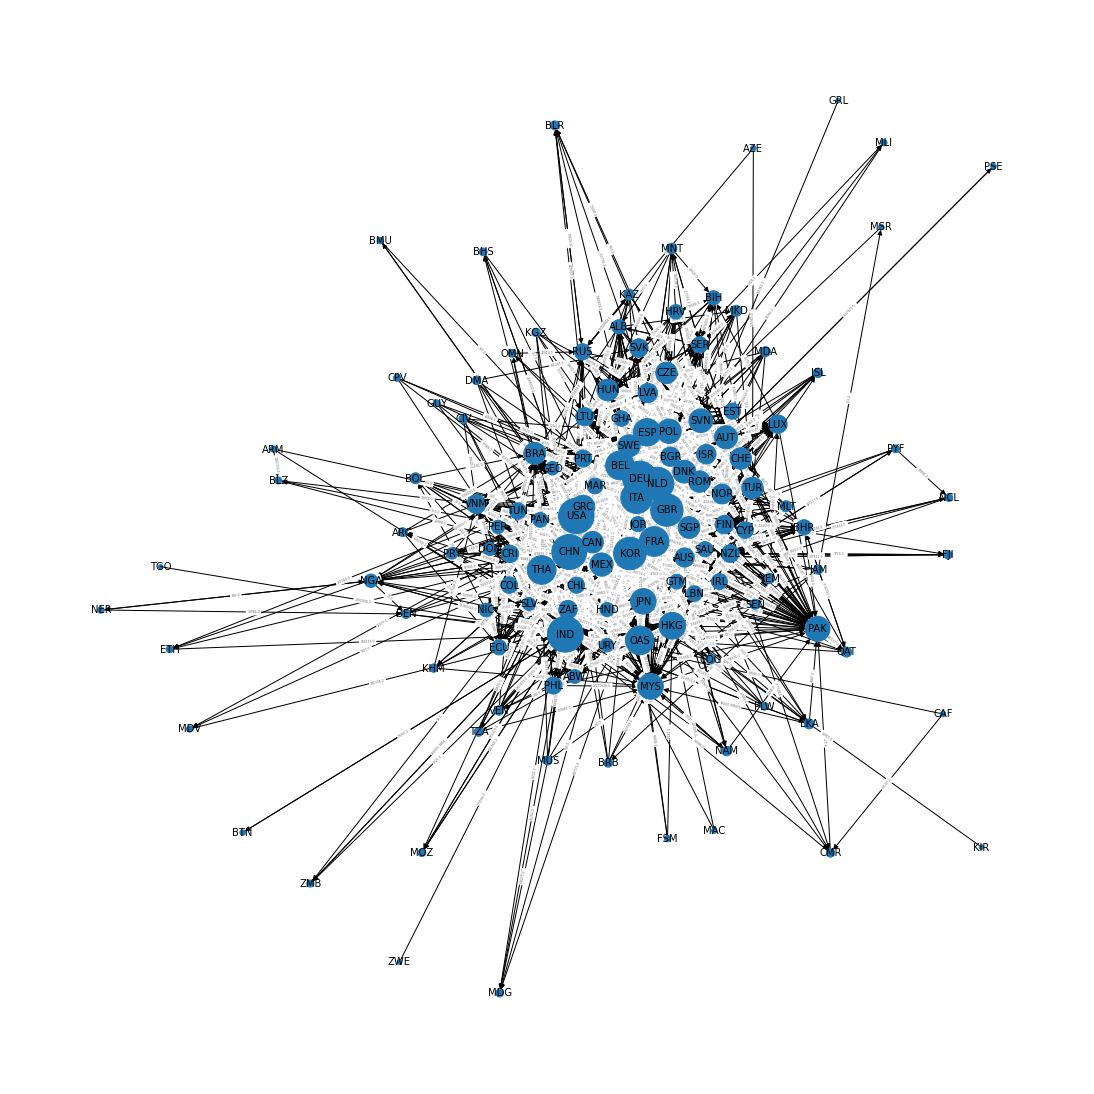

In [ ]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
nx.draw(G_data, pos, with_labels=True, node_size=[10 + v[1]*10 for v in degree], font_size = 10) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data, 'Weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

중심부를 확인해보면 위쪽 부근에 유럽국가들이 모여있으며 중심왼쪽에 아메리카 아래쪽에 아시아 국가들이 현존하는 것을 확인할 수 있다. 

따라서 가까운 국가들끼리 알루미늄 교역량이 많다고 분석할 수 있다.

###Diameter/Density/Reciprocity/Transitivity

In [ ]:
print('diamter:', nx.diameter(nx.to_undirected(G_data)))
print('density:', nx.density(G_data))
print('transitivity:', nx.transitivity(G_data))
print('reciprocity:', nx.reciprocity(G_data))
#diameter의 경우는 가장 먼 경로이기 때문에 undirected로 계산해도 같은 값이 나오지만
#density의 경우 계산 방식에 있어서 가능한 노드의 수가 2배이기 때문에 undirected로 나온 값을 2로 나누어야 한다. 

diamter: 4
density: 0.10337202874516307
transitivity: 0.5217976572832043
reciprocity: 0.4588235294117647


Diameter는 4다. 이는 알루미늄 스크랩 네트워크에서 가장 멀리 떨어진 국가들 사이의 edge가 4개라는 것이다. 즉 2개의 국가 사이에 4개의 edge가 있다는 것은 어떠한 국가들이라도 알루미늄 스크랩을 3개의 국가(시작 노드를 포함할 경우 4개)를 거친다면 거래할 수 있다는 것이다.

Density는 undirected 방식으로 나눈 값을 2로 나눈 0.1033이다.이는 알루미늄 스크랩 네트워크에서 가능한 모든 Edge 수 와 실제 엣지개수의 비율이 약 10.3퍼센트 라는 것이다. Degree distribution 해석에서 말했듯이 실제 degree가 적고 무역량 역시 적은 국가들은 대부분 소수의 국가들로부터만 거래를 하기 때문에 가능한 edge수는 134개이지만 10개 이하로 edge수를 선택하게 되어 desnity가 매우 떨어졌고 대부분의 무역량을 담당하는 소수의 국가들이 134개의 edge중 60개 이상의 edge수를 선택하지만 그 수가 적기 때문에 density가 약 10.3퍼센트로 낮게 나온 것이다.

transitivity는 0.5218이다. 이는 node 3개가 연결되어 있을 때 연결된 3개의 각 node가 나머지 2개의 node와 모두 연결되어 있을 확률이 약 52퍼센트라는 것이다.  어찌보면 이익을 위해 무역을 진행하기 때문에 당연하다고 할 수 있다. A국가와 B국가가 서로 무역을 하고 B국가와 C국가가 서로 무역을 한다면 이는 A,B,C 세개의 국가가 어느 정도 인접해있다고 볼 수 있다. 이때 A국과 C국이 분쟁을 하거나 이해관계가 정말 맞지 않는 경우를 제외하면 인접해 있는 A국과 C국은 서로에게 좋은 판매자이자 구매자가 될 수 있기 때문에 tranitivity가 52퍼센트로 낮은 Density와 반대로 인접해 있는 국가들끼리는 무역이 잘 이루어진다고 할 수 있다.

Reciprocity는 약 0.4588이다. 이는 연결된 두 node가 서로 주고 받을 확률, 즉 본 데이터에서는 무역이 이루어지는 양 국에서 알루미늄 스크랩을 서로 수출 수입할 확률이 약 46퍼센트라는 것이다. 무역량이 적고 degree가 적은 국가들의 경우는 주로 수입만을 하기 때문에 수출 수입이 이루어지지 않지만, 무역량이 많을 경우 동일한 제품이어도 가격, 품질 등이 각 국가별로 다르기 때문에 서로의 니즈에 맞게 수출 수입이 모두 일어날 수 있다. A국은 품질이 좋고 가격이 비싼 알루미늄 스크랩을 판매, B국은 품질은 조금 떨어지더라도  가격이 좋은 알루미늄 스크랩을 판매한다면 두 국가는 서로에게 좋은 판매자이자 소비자가 될 수 잇다. transivity보다는 떨어지는 약간 수치를 보이는데 이는 무역량이 적은 국가들의 경우 가장 degree가 낮고 무역량이 적은 국가와 인접한 국가들끼리의 거래는 모두 수입으로 이루어지기 때문에 연결은 되있어도 수출 수입이 동시에 일어나지 않아 Reciprocity가 조금 더 낮은것으로 보여진다.

## 3)Centrality

3) 노드 중심성(Degree/betweenness/closeness/eigenvector 등) 지표 별 Key actor에 대한 설명

Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가

etweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가

Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?

Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가?

In [ ]:
deg_cen = nx.degree_centrality(G_data)
bet_cen = nx.betweenness_centrality(G_data)
clo_cen = nx.closeness_centrality(G_data)
eig_cen = nx.eigenvector_centrality(G_data)

In [ ]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality:
 [('IND', 0.9552238805970149), ('USA', 0.9328358208955224), ('CHN', 0.9029850746268656)]
betweenness centrality:
 [('USA', 0.1485293481918646), ('IND', 0.11377586635280795), ('CHN', 0.09180407162270428)]
closeness centrality:
 [('IND', 0.8105516720196486), ('KOR', 0.7114842454394693), ('CHN', 0.707553393254721)]
eigenvector centrality:
 [('IND', 0.2730928120859668), ('CHN', 0.2465598667342979), ('KOR', 0.2405689997940369)]


- Degree Centrality: 연결중심성이 높다는 것은 특정 node 에 연결된 edge 의 개수가 많다는 것을 의미한다. 이 데이터에서는 IND, USA, CHN 순서로 edge 가 연결되어 있다는 것을 알 수 있다. 
- Betweenness Centrality: 매개중심성은  얼마나 많은 최단 경로가 특정 노드를 지나는 것으로 측정할 수 있다. 이 데이터에서는 IND, USA, CHN 가 순서대로 broker 역할을 하는 node임을 알 수 있다.
- Closeness centrality: 근접중심성은 어떠한 node가 다른 node들에 비해 최단거리를 가지는지에 대해 측정한다. 이 데이터에서는 IND,CHN, KOR 순서대로 다른 node들과의 거리가 가장 가까운 중요한 node 로 볼 수 있다. 
- Eigenvector centrality: 고유벡터 중심성은 중심성을 계산할 때 다른 node들의 중심성을 반영해서 계산한다. 이 데이터에서는 IND, CHN, KOR 순서대로 중요한 node들에 연결되어 있다고 볼 수 있다. 

Degree centrality는 인도가 0.9552, 미국이 0.9328, 중국이 0.9029가 나왔다. 즉,인도는 네트워크내 95퍼센트의 국가들과,미국은 93퍼센트의 국가들과, 중국은 90퍼센트의 국가들과 무역을 진행한다고 보여지고, 인도가 가장 많은 국가들과 거래를 하는 것을 알 수 있었다.

Betweeness centrality 미국이 0.1485, 인도가 0.1137, 중국이 0.0918이 나왔다. 즉, 네트워크 내 알루미늄 스트랩이 거래 될때 약 15퍼센트의 거래(알루미늄 스트랩의 거래 양이 아닌 국가간 거래 수)가 미국을 거쳐서 진행되었고 11.3퍼센트 국가들의 인도를 통해서,  9퍼센트의 국가들이 중국을 거쳐서 알루미늄 스트랩을 거래하였다고 보여진다. 즉 인도가 가장 많은 국가들과 거래를 하지만 실제로 알루미늄 스트랩이 가장 많이 중간유통 되는곳은 미국인 것이다. 미국이 세계 무역의 중심지이기 때문에 미국을 통하여 가장 많이 거래가 이루어지는 것이라고 보여진다. 

Closeness centrality는 인도가 0.9105, 한국이 0.7114, 중국이 0.7075이다. Closeness centrality의 경우 그 값이 1에 가까울수록 해당 노드와 다른 노드들 간의 거리가 1개의 edge에 가깝다는 것이다.즉, 인도가 0 9105로 가장 큰데 이는 인도는 대부분의 국가와 알루미늄 스크랩을 직접 거래하기 때문이고 인도와 직접 거래를 하지 않은 국가들도 인도와 거래한 국가들과 대부분 거래하기 때문에 그 값이 매우 큰 것으로 보여진다. 한국이 0.7114, 중국이 0.7075로 그 뒤를 이었다. 한국의 경우 Degree는 중국보다 작았지만 중국보다 Closeness Centrality는 컸는데 이는 한국이 직접 거래한 국가들이 한국과 거래를 하지 않은 국가들과 많은 거래를 한데 비하여, 중국의 경우 직접 거래한 국가들이 중국과 거래하지 않은 국가들과 많은 거래를 하지 않은 것으로 해석된다.

Eigenvector centrality는 인도가 0.2730, 중국이 0.2465, 한국이 0.2405이다. 즉 무역량이 많은 주요 국가들과 인도가 가장 많이 연결되어있고, 그 다음으로 중국, 한국이 연결되어 있다는 것이다. 인도는 모든 Centrality에서 높은 수치를 보였고, 주요 국가들과도 대부분 연결되어 있끼 때문에 알루미늄 스트랩 무역에 있어서 가장 중요한 국가임을 알 수 있었다. 중국은 모든 Centrality에서 높은 값을 보이고 인도보다 조금 낮았기 때문에 인도와 유사하다고 생각되고, 한국의 경우 거래하는 국가들의 수는(Degree) 상대적으로 적지만 그 국가들에서 주요국가들의 비율이 높았음을 알 수 있었다.

## 4) 결론

Degree Distribution의 경우 대부분의 Size가 큰 Node들끼리 중앙에서 뭉쳐있는데 비해서 인도는 중앙에서 조금 떨어져서 Size가 작은 Node 들과도 edge를 가지고 있다. 이는 인도의 경우 무역량이 많은 선진국들 뿐만 아니라 무역량이 적은 후진국들과도 무역을 진행하고 있음을 알 수 있었다. 특정 국가를 제외하고 진행한경우에는 지역별로 국가들이 뭉쳐있는것을 확인할 수 있었다. 무역의 특성상 지역간의 거리가 중요한 요소임을 확인할 수 있었다. 

diameter가 4로 상당히 적은것을 확인할 수 있는데 이는 주요국가들 간에 많은 양의 교류를 하고 인도와 같은 몇몇 거점 국가들이 적은 무역량의 국가들과 교류하기 때문이다. 또한 무역량이 적은 국가들은 특정 거점 국가들과만 무역을 하기에 density가 0.1033으로 낮은것으로 확인할 수 있다. 이러한 특징에서 trasitivity 0.5218과 reciprocity 0.4588로 무역량이 많은 국가들 사이에는 무역을 견고하게 하며 폐쇄성을 띄고 무역량이 적은 국가는 특정국가로부터만 무역을 하는 형태임이 설명된다. 

인도, 미국, 중국과 같이 중요국들이 무역량이 많음을 centrality를 통해 확인할 수 있다. 특히 인도의 경우 closeness centrality가 높게 나타났는데 인도가 무역량이 많지 않은 국가들과 무역하는 주요 거점국임을 확인할 수 있다. 한국역시 closeness centrality 0.7114와 eigenvector 0.2405로 각 2위와 3위를 하였지만 degree centrality와 betweeness centrality는 낮은 것으로 나타났다. 이는 한국이 무역하는 국가는 인도,미국,중국에 비해 적지만 중요국가들과 많은 거래를 하기 때문으로 보인다. 

한국의 경우 남북으로 분열되어 사실상 섬의 형태를 띠고 있으며 미국, 유럽 등의 주요 국가와 지리적 거리가 먼것이 degree, betweeness centrality는 낮으나 coloseness eigenvector가 높은 이유로 보인다. 하지만 이러한 형태의 무역은 사드 무역 보복, 한일 무역분쟁과 같이 특정 국가와 무역 마찰을 미칠경우 큰 문제를 야기할 수 있다. 따라서 무역을 하는 국가들의 수를 늘려 다각화를 통해 무역 분쟁을 예방할 수 있다. 또한 인도와 같이 무역량이 적은 수의 국가들과 무역 관계를 형성하는 중요거점 국가가 된다면 핵심 무역 수출국으로 거듭날 수 있다. 









**creative application areas of SNA **

*  알루미늄 무역을 SNA로 분석하며 국가간의 무역과 관계를 파악할 수 있으며 향후 어떤 전략으로 무역을 진행할 수 있는지 알 수 있었다. 알루미늄 무역뿐만 아니라 반도체, 자동차 (부품) 등 다양한 부품과 제품에 대한 SNA 분석이 가능하다. 뿐만 아니라 요소수와 같이 대체 불가한 무역 부품에 대한 SNA 분석으로 무역분쟁과 같이 부족 상태가 발생할 경우 어떻게 대처할지 대비책을 마련할 수 있다. 

*  또한 한동안 코로나 백신이 중요 국가들에만 보급되었는데 이에 대한 SNA 분석을 한다면 주요 생산국 및 수입국을 파악할 수 있고 백신 생산능력, 개발능력 등의 보건 수준을 파악해 볼 수 있는 좋은 기회가 될 것이라 생각한다. 

**그외 창의적인 SNA 적용분야**
*   MBTI별 사람을 노드로 만나는 사람의 수를 weight로 하여 MBTI별 만나는 MBTI별 사람의 수를 구하는 데이터를 수집하여 SNA 분석을 통해 어떤 사람들끼리 친밀감을 형성하는지 분석한다.
*  하이테크 제품의 시대에 있어서 휴대폰과 같은 주요제품들과 호환을 이루는 웨어러블 기기들은
제품의 생태계를 구축하는데 결정적인 영향을 미치고 있다.따라서 주요기업의 제품을 사용하는 사람들을 선정하고 각 기업별 제품과 웨어러블들을 node로 ,제품-웨어러블의 엣지의 경우  weight를 실제로 호환해서 사용한 정도 (0:호환해서 사용하지 않았다-연결x 1:호환해서 사용하다 불만족하여 현재 사용하지 않는다,  2: 호환해서 가끔씩 사용한다, 3: 호환해서 만족해서 사용한다..등)로 나타나고 제품-제품 엣지의 경우 weight를 0으로 하여 네트워크를 확인한다(동일 기능의 성능만 다른 제품들이기 때문에 중복 사용한다고 생각하지 않았다). 이는 제품 생태계가 어느 정도 구축되어 있는지 확인할 수 있고 약한 엣지들은 분석을 통하여 웨어러블 기기 보완에도 활용될 수 있다

* 게임 사이트, 쇼핑 사이트, OTT 사이트에서는 그 사이트내 ID 뿐만 아니라
네이버, 카카오,페이스북, 트위터,애플 등 기존 네트워크가 구축되어있는 서비스들의 ID로 서비스를 사용할 수 있다.
따라서 이러한 기존 네트워크 사이트와 게임,쇼핑 OTT 사이트를 Node로 하며 Source node ID로 Target Node를 접속한다 생각하며 , weight는 Target Node 이용자중 Source Node ID로 이용하는 비율이다. 이러한 분석은 기존 네트워크 사이트의 구조를 파악할때 타 사이트와의 연동 지표로 추가로 사용될 수 있으며 기존 네트워크의 확장정도를 파악하는데 사용될 수 있다.

## Additional

버전 문제때문에 실행 시키지 말것!


In [ ]:
import networkx as nx
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

https://briandew.wordpress.com/2016/06/15/trade-network-analysis-why-centrality-matters/

In [ ]:
G = nx.DiGraph() # create a directed graph called G
 
# Loop reads a csv file with scrap aluminum bilateral trade data
with open('/content/drive/Shareddrives/데마 팀플 2/HW5/globaltrade_2012.csv', 'r') as csvfile:

     csv_f = csv.reader(csvfile)
     next(csv_f)

# Now we build the network by adding each row of data 
# as an edge between two nodes (columns 1 and 2).
     for row in csv_f:
          G.add_edge(row[0],row[1],weight=row[2])

In [ ]:
!pip uninstall networkx

Found existing installation: networkx 1.11
Uninstalling networkx-1.11:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/networkx-1.11.dist-info/*
    /usr/local/lib/python3.7/dist-packages/networkx/*
    /usr/local/share/doc/networkx-1.11/INSTALL.txt
    /usr/local/share/doc/networkx-1.11/LICENSE.txt
    /usr/local/share/doc/networkx-1.11/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-1.11/examples/advanced/eigenvalues.py
    /usr/local/share/doc/networkx-1.11/examples/advanced/heavy_metal_umlaut.py
    /usr/local/share/doc/networkx-1.11/examples/advanced/iterated_dynamical_systems.py
    /usr/local/share/doc/networkx-1.11/examples/advanced/parallel_betweenness.py
    /usr/local/share/doc/networkx-1.11/examples/algorithms/blockmodel.py
    /usr/local/share/doc/networkx-1.11/examples/algorithms/davis_club.py
    /usr/local/share/doc/networkx-1.11/examples/algorithms/hartford_drug.edgelist
    /usr/local/share/doc/networkx-1.11/examples/algorithms/krack

In [ ]:
!pip install networkx

In [ ]:
!pip uninstall matplotlib

Found existing installation: matplotlib 2.2.3
Uninstalling matplotlib-2.2.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-2.2.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-2.2.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-2.2.3


In [ ]:
!pip install matplotlib

     |████████████████████████████████| 12.6 MB 11.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.3 requires networkx>=2.0, but you have networkx 1.11 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.3 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.3 which is incompatible.
arviz 0.12.0 requires matplotlib>=3.0, but you have matplotlib 2.2.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install matplotlib

     |████████████████████████████████| 11.2 MB 17.8 MB/s 
     |████████████████████████████████| 900 kB 49.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.3 requires networkx>=2.0, but you have networkx 1.11 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


다음과 같은 코드로 무역 금액을 확인할 수 있다. 
미국은 중국으로 1199682944 달러를 수출했다. 

In [ ]:
usachnexp = G.edge['USA']['CHN']['weight']
print ('USA 2012 scrap aluminum exports to China, in USD: ', usachnexp) 

USA 2012 scrap aluminum exports to China, in USD:  1199682944


In [ ]:
# Calculate eigenvector centrality of matrix G 
# with the exports value as weights
ec = nx.eigenvector_centrality_numpy(G, weight='weight')

# Set this as a node attribute for each node
nx.set_node_attributes(G, 'cent', ec)

# Use this measure to determine the node color in viz
node_color = [float(G.node[v]['cent']) for v in G]

In [ ]:
# Blank dictionary to store total exports
totexp = {}

# Calculate total exports of each country in the network
for exp in G.nodes(): 
     tx=sum([float(g) for exp,f,g in G.out_edges_iter(exp, 'weight')])
     totexp[exp] = tx
     avgexp = np.mean(tx)
nx.set_node_attributes(G, 'totexp', totexp)

# Use the results later for the node's size in the graph
node_size = [float(G.node[v]['totexp']) / avgexp for v in G]

### Eigenvector Centrality

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


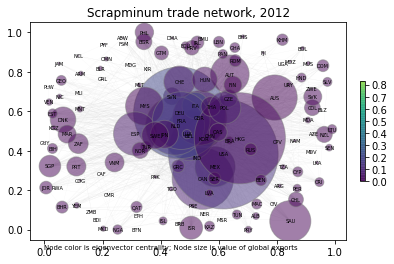

In [ ]:
# Visualization
# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G,k=30,iterations=8) 

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, 
                               node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', 
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')

# Add labels and title
plt.text(0,-0.1, 
         'Node color is eigenvector centrality; Node size is value of global exports', 
         fontsize=7)
plt.title('Scrapminum trade network, 2012', fontsize=12)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)

# Plot options
plt.margins(0,0)
# plt.axis('off# Save as high quality png')
# plt.savefig('760200.png', dpi=1000)

해당 그래프는 eigenvector centrality를 보여준다. 
중국이 가장 크며 한국 인도 순인 것을 확인할 수 있다. 
다른 나라에 비해 상대적으로 높은 수입 가치라는 보다 단순한 척도에서 중국의 엄청난 영향력을 쉽게 추론할 수 있다.

In [ ]:
# Calculate eigenvector centrality of matrix G 
# with the exports value as weights
oc = nx.out_degree_centrality(G) # replaces ec in the above

# Set this as a node attribute for each node
nx.set_node_attributes(G, 'cent', oc)

# Use this measure to determine the node color in viz
node_color = [float(G.node[v]['cent']) for v in G]

In [ ]:
# Blank dictionary to store total exports
totexp = {}

# Calculate total exports of each country in the network
for exp in G.nodes(): 
     tx=sum([float(g) for exp,f,g in G.out_edges_iter(exp, 'weight')])
     totexp[exp] = tx
     avgexp = np.mean(tx)
nx.set_node_attributes(G, 'totexp', totexp)

# Use the results later for the node's size in the graph
node_size = [float(G.node[v]['totexp']) / avgexp for v in G]

### Outdegree Centrality

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


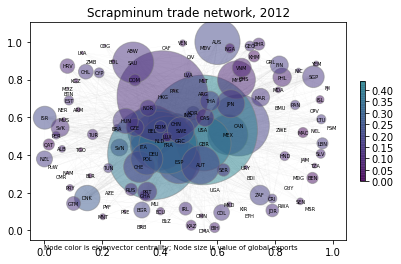

In [ ]:
# Visualization
# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G,k=30,iterations=8) 

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, 
                               node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', 
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')

# Add labels and title
plt.text(0,-0.1, 
         'Node color is outdegree centrality; Node size is value of global exports', 
         fontsize=7)
plt.title('Scrapminum trade network, 2012', fontsize=12)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)

# Plot options
plt.margins(0,0)
# plt.axis('off# Save as high quality png')
# plt.savefig('760200.png', dpi=1000)

Out-degree centrality 하나의 노드에서 다른 노드들로 나가는(out) 관계만을 고려하는 방법이다.수출은 미국과 독일 순으로 많이 하는 것을 확인할 수 있다. 

## Community Detection
- 연결 밀도가 높은 집단끼리 묶어서 분석
  - community: modularity가 높은 집단
  - [modularity]((https://mons1220.tistory.com/93)): 커뮤니티 내부에 펼쳐져 있는 링크들이 무작
  
  해당 분석에서는 구조적 유사성 지표를 활용하므로 수출 및 수입의 합인 (undirected) 무역액을 활용하였다. 

In [ ]:
G_data = nx.from_pandas_edgelist(data, source='Source', target='Target')

In [ ]:
print(nx.info(G_data))

Graph with 135 nodes and 1441 edges


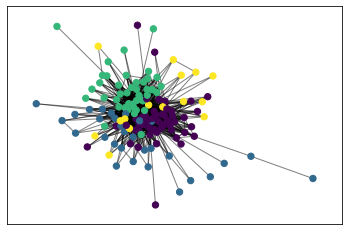

In [ ]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = cl.best_partition(G_data)

pos = nx.spring_layout(G_data)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_data, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_data, pos, alpha=0.5)
plt.show()

크게 4가지 유형으로 나누어서 분석이 가능한 것으로 확인된다. 크게 유럽, 그외 중요 국가, 무역량이 적은 국가, 중요 거점 국가로 파악된다.

### Link Prediction

- 노드 간 missing/latent link 예측
  - 구조적 유사성 지표를 통해 두 노드 간 유사한 정보를 기반으로 예측

해당 분석에서는 구조적 유사성 지표를 활용하므로 수출 및 수입의 합인 (undirected) 무역액을 활용하였다. 

In [ ]:
common_neighbor = [(e[0], e[1], len(list(nx.common_neighbors(G_data, e[0], e[1])))) for e in nx.non_edges(G_data)]
common_neighbor.sort(key=lambda x: x[-1], reverse=True)
common_neighbor[:10]

[('ESP', 'MYS', 38),
 ('NLD', 'JPN', 37),
 ('ESP', 'JPN', 33),
 ('BEL', 'GRC', 33),
 ('OAS', 'GRC', 29),
 ('USA', 'SVN', 29),
 ('USA', 'DNK', 28),
 ('OAS', 'DNK', 27),
 ('ISR', 'PAK', 27),
 ('PAK', 'BRA', 27)]

In [ ]:
'''
공통 이웃이 많은 경우 더 연결될 가능성이 높음
'''
common_neighbor = nx.common_neighbor_centrality(G_data)
common_neighbor = list(common_neighbor)
common_neighbor.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in common_neighbor[:10]:
    print(f"({u}, {v}) -> {p}")

(ESP, MYS) -> 43.9
(NLD, JPN) -> 43.099999999999994
(ESP, JPN) -> 39.9
(BEL, GRC) -> 39.9
(OAS, GRC) -> 36.7
(USA, SVN) -> 36.7
(USA, DNK) -> 35.9
(OAS, DNK) -> 35.099999999999994
(ISR, PAK) -> 35.099999999999994
(PAK, BRA) -> 35.099999999999994


In [ ]:
'''
노드가 공통 이웃을 통해 다른 노드에 보낼 수 있는 정보를 기반으로 측정
'''
aa = nx.adamic_adar_index(G_data)
aa = list(aa)
aa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in aa[:10]:
    print(f"({u}, {v}) -> {p}")

(ESP, MYS) -> 10.931513113396564
(NLD, JPN) -> 10.620847090036719
(ESP, JPN) -> 9.35475273057581
(BEL, GRC) -> 9.175521389273097
(OAS, GRC) -> 8.127669682135359
(USA, SVN) -> 8.007807945365295
(OAS, DNK) -> 7.520792680343915
(USA, DNK) -> 7.506383898490196
(TUR, AUT) -> 7.501875518367325
(PAK, BRA) -> 7.337485620076584


위의 3 결과를 확인한 결과 ESP-MYS, NLD-JPN, ESP-JPN을 공통 이웃이 많기에 추천함을 알 수 있다. 

In [ ]:
'''
degree가 높은 노드들이 결국은 연결될 것이라는 관점
'''
pa = nx.preferential_attachment(G_data)
pa = list(pa)
pa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in pa[:10]:
    print(f"({u}, {v}) -> {p}")

(NLD, JPN) -> 3648
(USA, DNK) -> 3040
(ESP, MYS) -> 3025
(USA, SVN) -> 2960
(OAS, GRC) -> 2760
(HUN, KOR) -> 2656
(ESP, JPN) -> 2640
(OAS, DNK) -> 2622
(CZE, KOR) -> 2490
(TUR, THA) -> 2418


한국의 경우 헝가리와 체코와는 무역을 진행하지 않고 있지만 degree가 높기때문에 결국 연결될 가능성이 높다. 